# Your Everyday Cheatsheet for Python’s Matplotlib

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import pandas_profiling as pf
import seaborn as sns
sns.set(font_scale = 2)
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msn
pd.set_option('display.max_columns', 190)

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize


print('Done')

Done


Data preparation is a common task before any data visualization or data analysis project. Because data never comes in the way you want. I am using a dataset that contains Canadian Immigration information. Import the necessary packages and the dataset first.

Importing dataset

In [26]:
df = pd.read_excel(r'C:\Users\ABDULAZEEZ R.O\Desktop\1\Dataset\Canada.xlsx',sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


I am skipping the first 20 rows and the last 2 rows because they are just text not tabulated data

Let's check the size of our data


In [27]:
#shape
nrows, ncols = df.shape
print(f'The number of observations in our dataset are {nrows}, while the number of features are {ncols}')

The number of observations in our dataset are 195, while the number of features are 43


In [28]:
# Checking the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

To get the idea about the dataset, see the column names

In [29]:
# columns are
df.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

Let's visualize our missing columns

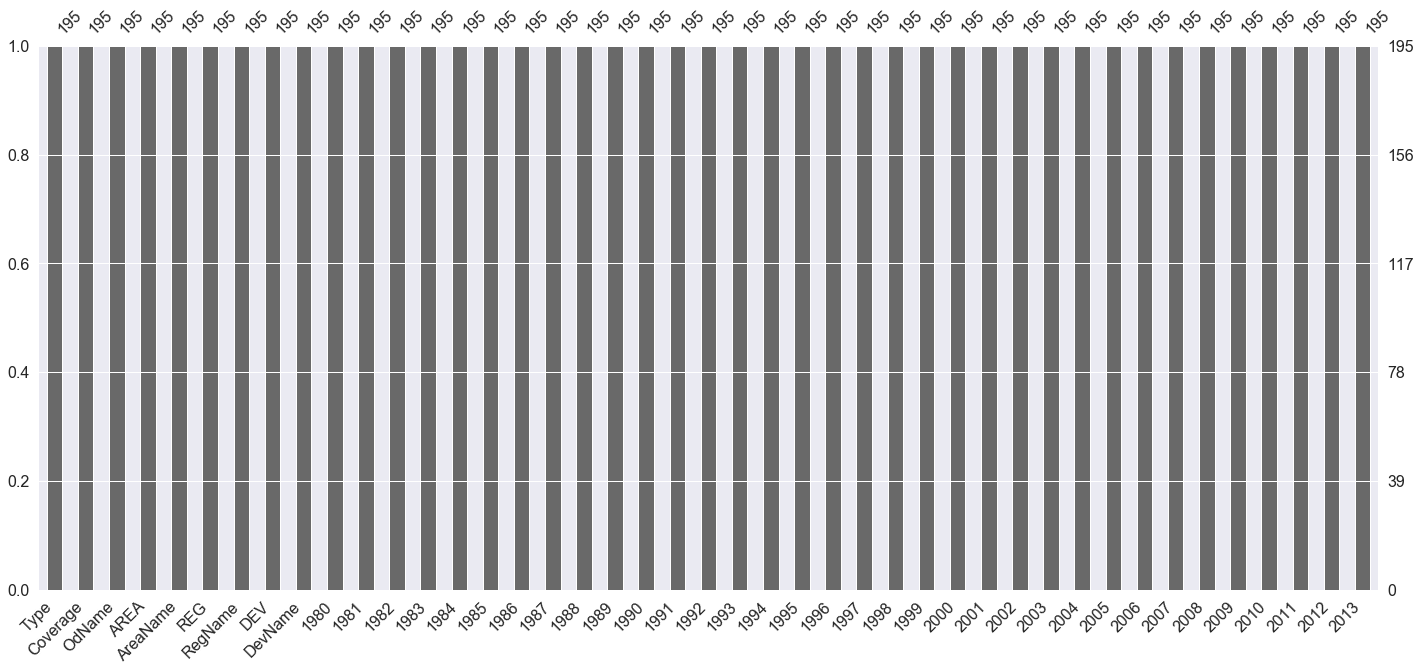

In [30]:
# Visualize missing values
msn.bar(df)

In [35]:
# Check if there are any null values in any of the columns
df.isnull().values.any()

False

We can see that our columns are free from null values

We are not going to use all the columns for this analysis. So, let’s get rid of the columns that we are not using to make the dataset smaller and more manageable.

In [31]:
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


Look at the columns. The column ‘OdName’ is actually country name, ‘AreaName’ is continent and ‘RegName’ is the region of the continent. Change the column names to something more understandable.

In [25]:
df.head(5)

,Type,Coverage,AreaName,RegName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Immigrants,Citizens,Northern America,Northern America,..,..,..,..,..,..,..,..,..,..,3,3,4,3,1,1,1,..,..,..,..,..,..,..,..,..,..,..,..,..,..,1,1
1,Immigrants,Foreigners,Africa,Eastern Africa,1471,1641,1426,1094,1187,1134,1454,2734,3237,4094,4404,6535,9729,7244,4046,4373,4254,3094,3056,3936,4825,4868,4049,5808,7726,7083,6750,6669,6705,6922,8591,8956,8846
2,Immigrants,Foreigners,Africa,Middle Africa,33,27,44,32,42,30,61,100,91,119,185,328,575,534,412,702,1080,871,1129,1456,1847,1852,1699,1929,2452,2802,2834,2951,3034,3255,3369,3146,4602
3,Immigrants,Foreigners,Africa,Northern Africa,1100,1268,1348,936,842,840,1115,1864,2239,3574,4693,4745,4322,4119,4262,5875,6652,6304,5930,6706,8732,12201,11979,11355,12478,11323,12705,11750,13456,16320,19271,15712,15453
4,Immigrants,Foreigners,Africa,Southern Africa,1041,1126,791,387,297,327,725,1480,1329,1319,911,834,1071,1567,2371,1474,1324,1737,1354,1492,1778,1912,1515,1258,1203,1012,1148,1230,1184,1235,1306,1049,1348


In [32]:
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Now, the dataset has become more understandable. We have Country, Continent, Region, DevName that says if the country is developing, or developed. All the year columns contain the number of immigrants in that particular year. Now, add a ‘total’ column which will show the total immigrants that came into Canada from 1980 to 2013 from each country.

In [33]:
df['Total'] = df.sum(axis=1)

In [34]:
# Look, a new column ‘Total’ is added at the end.
df.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


I always like to set a meaningful column as an index instead of just some numbers.
Set the ‘Country’ column as the index

In [37]:
# Set the ‘Country’ column as the index
df = df.set_index('Country')

This dataset was nice and clean to start with. So this was enough cleaning for now. If we need something else we will do that as we go.

### VISUALIZING OUR DATASET WITH DIFFERENT TYPES OF PLOT

We will practice several different types of plot in this article such as line plot, area plot, pie plot, scatter plot, histogram, bar graph.

Chose a style so you do not have to work too hard to style the plot. Here are the types of styles available:

In [38]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

I am taking a ‘ggplot’ style. Feel free to try any other style for yourself.

In [40]:
plt.style.use(['ggplot'])

## Line plot

It will be useful to see a country’s immigration tend to Canada by year. Make a list of the years 1980 to 2013.

In [43]:
years = list(map(int, range(1980, 2014)))

I picked Switzerland for this demonstration. Prepare the immigration data of Switzerland and the years.

In [142]:
df.loc['Switzerland', years].head()

1980    806
1981    811
1982    634
1983    370
1984    326
Name: Switzerland, dtype: object

Here is part of the data of Switzerland. It’s time to plot. It is very simple. Just call the plot function on the data we prepared. Then add title and the labels for the x-axis and y-axis

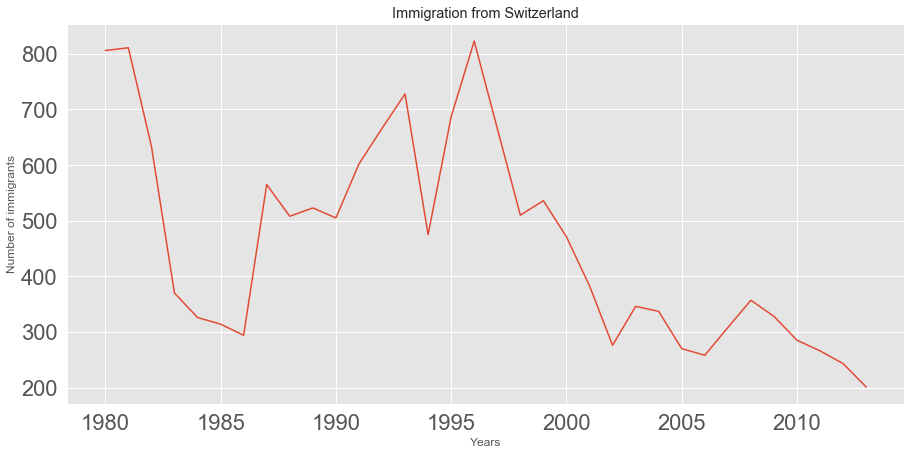

In [61]:
df.loc['Switzerland', years].plot()
plt.rc('figure', figsize=[10,5])
plt.title('Immigration from Switzerland')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

What if we want to observe the immigration trend over the years for several countries to compare those countries’ immigration trends to Canada? That’s almost the same as the previous example. Plot the number of immigrants of three south Asian countries India, Pakistan, and Bangladesh vs the years.

In [51]:
ind_pak_ban = df.loc[['India', 'Pakistan', 'Bangladesh'], years]
ind_pak_ban.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
Bangladesh,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789


Look at the format of the data. It is different than the data for Switzerland above. If we call the plot function on this DataFrame(ind_pak_ban), it will plot the number of immigrants for each country in the x-axis and the years in the y-axis. We need to change the format of the dataset:

In [53]:
ind_pak_ban.T.head()

Country,India,Pakistan,Bangladesh
1980,8880,978,83
1981,8670,972,84
1982,8147,1201,86
1983,7338,900,81
1984,5704,668,98


Now it will plot the years in the x-axis and the number of immigrants for each country on the y-axis.

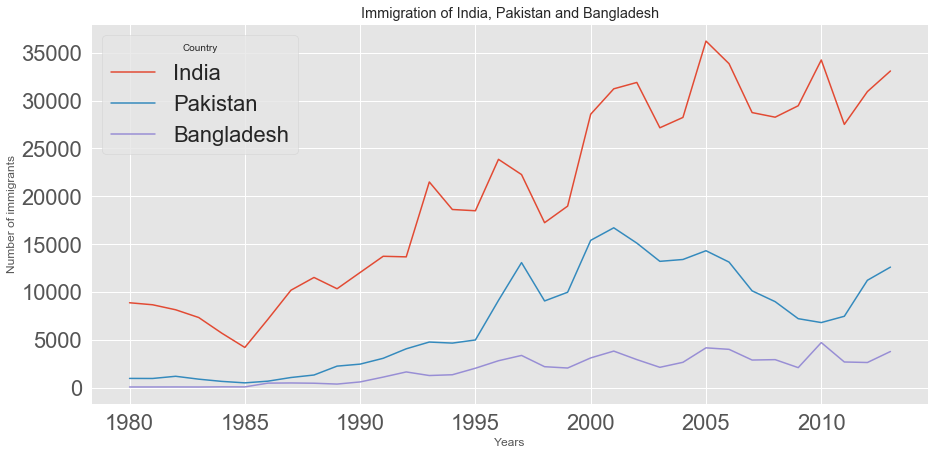

In [64]:
plt.rc('figure', figsize=[15,7])
ind_pak_ban.T.plot()
plt.title('Immigration of India, Pakistan and Bangladesh')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

## Pie Plot

To demonstrate the pie plot we will plot the total number of immigrants of the top three continents. We have the data for each country. So, group the number of immigrants, to sum up, the total number of immigrants for each continent.

In [84]:
cont = df.groupby('Continent', axis=0).sum()
top_3 = cont.sort_values(by = 'Total', ascending = False).head(3)
top_3

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148


Now, we have data that shows the number of immigrants of top three continents to canada. 

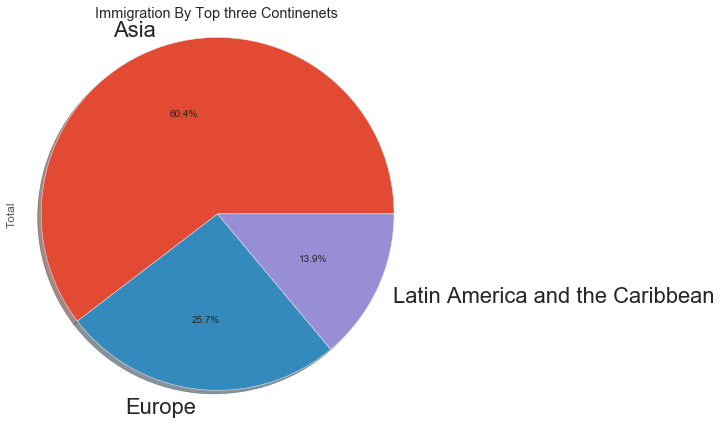

In [92]:
top_3['Total'].plot(kind='pie', figsize=(7,7),
                  autopct='%1.1f%%',
                  shadow=True)

plt.title('Immigration By Top three Continenets')
plt.axis('equal')
plt.show()

Notice, I have to use the ‘kind’ parameter. Other than the line plot, all other plots need to be mentioned explicitly in the plot function. I am introducing a new parameter ‘figsize’ that will determine the size of the plot.

This pie chart is understandable. But we can improve it with a little effort. This time I want to choose my own colors and a start angle.

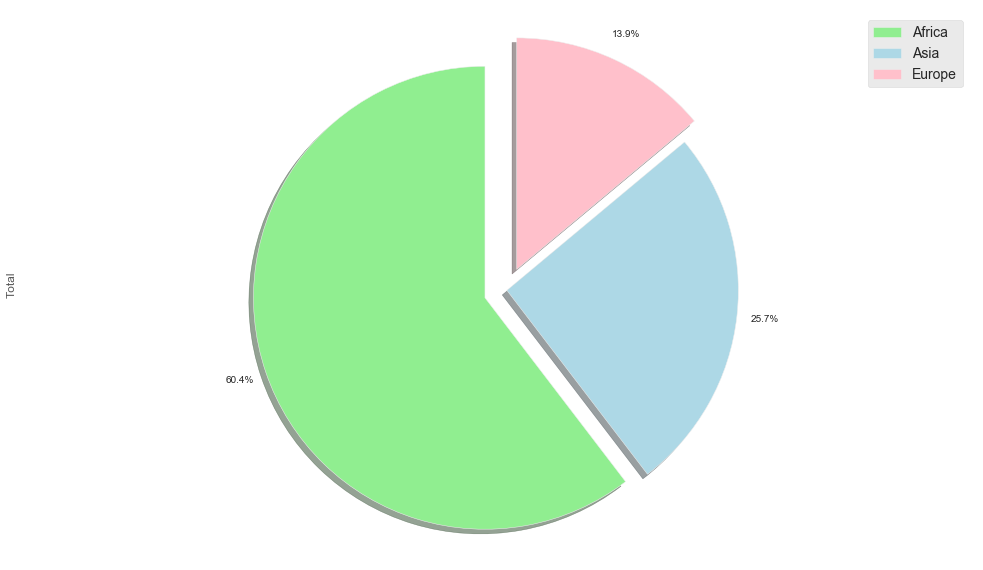

In [94]:
colors = ['lightgreen', 'lightblue', 'pink']
explode=[0.1, 0, 0.1]
top_3['Total'].plot(kind='pie', figsize=(17, 10),
                  autopct = '%1.1f%%', startangle=90,
                  shadow=True, labels=None, pctdistance=1.12, colors=colors, explode = explode)
plt.axis('equal')
plt.legend(labels=cont.index, loc='upper right', fontsize=14)
plt.show()

## Box plot


We will make a box plot of the immigrant’s number of China first.

In [95]:
china = df.loc[['China'], years].T

Here is our data. This is the box plot.

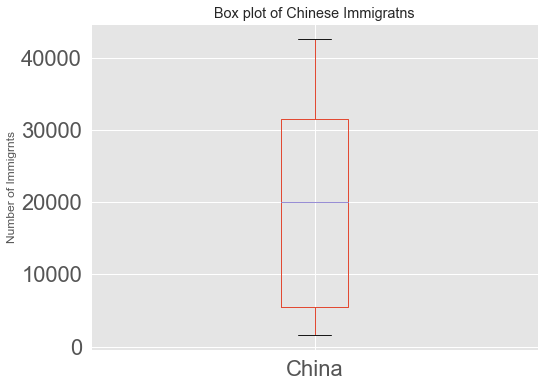

In [96]:
china.plot(kind='box', figsize=(8, 6))
plt.title('Box plot of Chinese Immigratns')
plt.ylabel('Number of Immigrnts')
plt.show()

We can plot several boxplots in the same plot. Use the DataFrame ‘ind_pak_ban’ and make box plots of the number of immigrants of India, Pakistan, and Bangladesh.

Text(0, 0.5, 'Number of Immigrants')

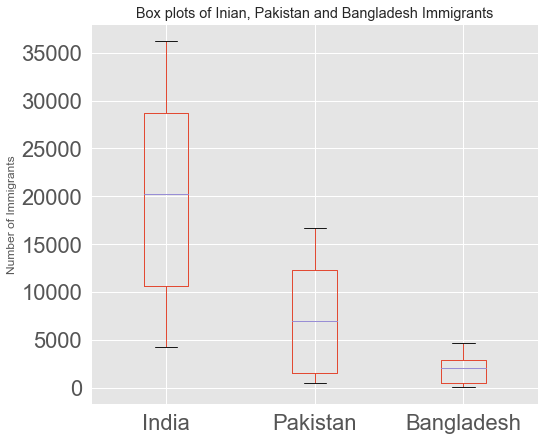

In [97]:
ind_pak_ban.T.plot(kind='box', figsize=(8, 7))
plt.title('Box plots of Inian, Pakistan and Bangladesh Immigrants')
plt.ylabel('Number of Immigrants')

## Scatter Plot

A Scatter plot is the best to understand the relationship between variables. Make a scatter plot to see the trend of the number of immigrants to Canada over the years.

For this exercise, I will make a new DataFrame that will contain the years as an index and the total number of immigrants each year.

In [112]:
totalPerYear = pd.DataFrame(df[years].sum(axis=0))
totalPerYear.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


We need to convert the years to integers. I want to polish the DataFrame a bit just to make it presentable.

In [113]:
totalPerYear.index = map(int, totalPerYear.index)
totalPerYear.reset_index(inplace=True)

# totalPerYear.head()

In [115]:
totalPerYear.columns = ['year', 'total']

In [116]:
totalPerYear.columns

Index(['year', 'total'], dtype='object')

In [117]:
totalPerYear.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


For the scatter plot, we need to specify the x-axis and y-axis for the scatter plot.

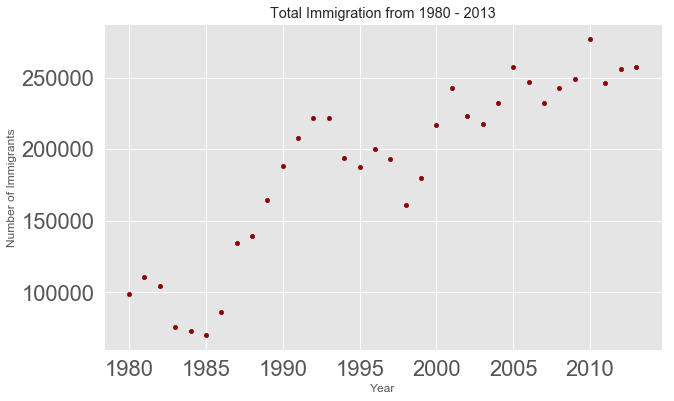

In [119]:
totalPerYear.plot(kind='scatter', x = 'year', y='total', figsize=(10, 6), color='darkred')
plt.rc('figure', figsize=[15,7])
plt.title('Total Immigration from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

Looks like there is a linear relationship between the years and the number of immigrants. Over the years the number of immigrants shows an increasing trend.

## Area Plot

The area plot shows the area covered under a line plot. For this plot, I want to make DataFrame including the information of India, China, Pakistan, and France.

In [120]:
top = df.loc[['India', 'China', 'Pakistan', 'France'], years]
top = top.T

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


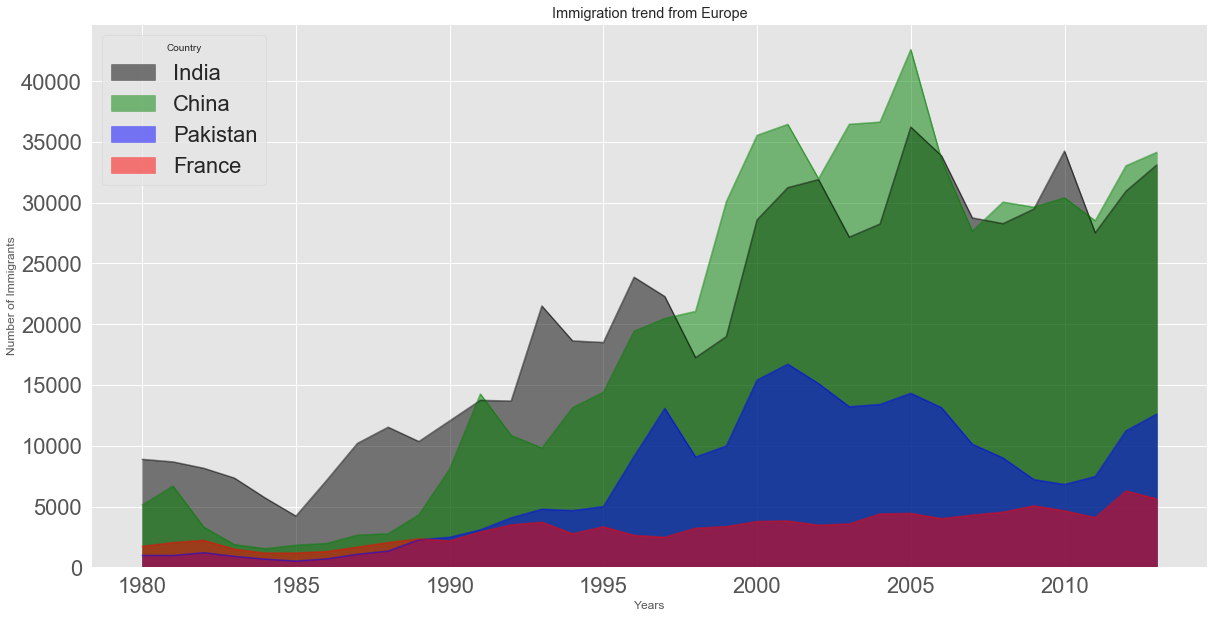

In [122]:
colors = ['black', 'green', 'blue', 'red']
top.plot(kind='area', stacked=False,
        figsize=(20, 10), colors=colors)

plt.title('Immigration trend from Europe')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Remember to use this ‘stacked’ parameter above, if you want to see the individual countries area plot. If you do not set the stacked parameter to be False, the plot will look like this:

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


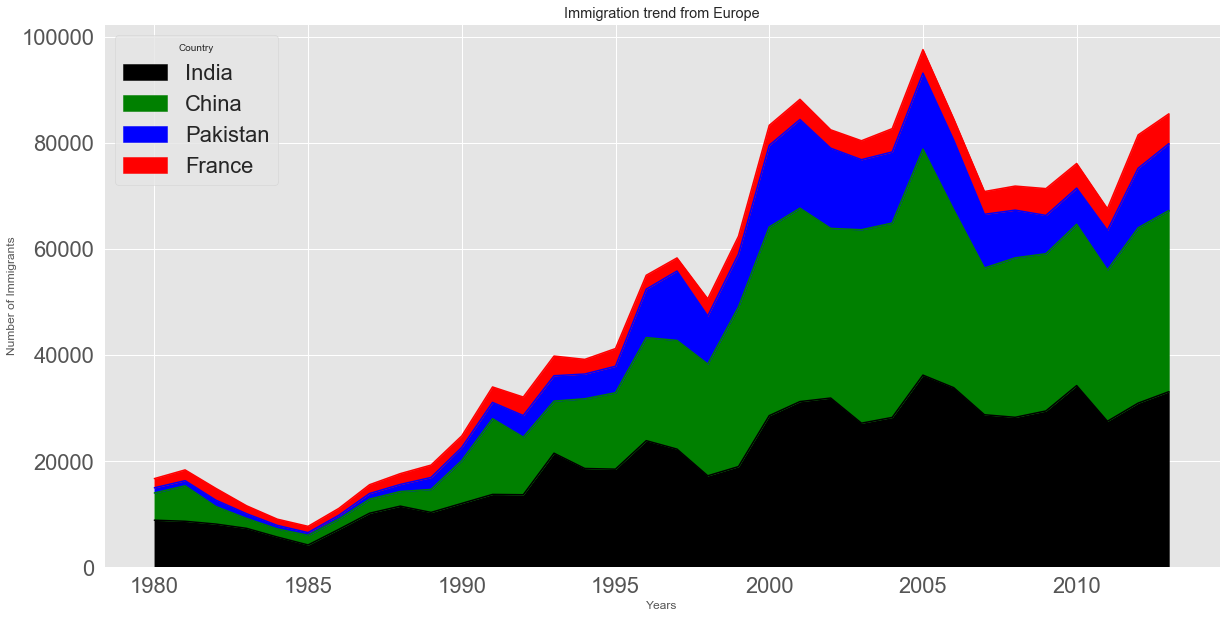

In [124]:
colors = ['black', 'green', 'blue', 'red']
top.plot(kind='area',
        figsize=(20, 10), colors=colors)

plt.title('Immigration trend from Europe')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

When it is unstacked, it does not show the individual variable’s area. It stacks on to the previous one.

## Histogram

The histogram shows the distribution of a variable. Here is an example:

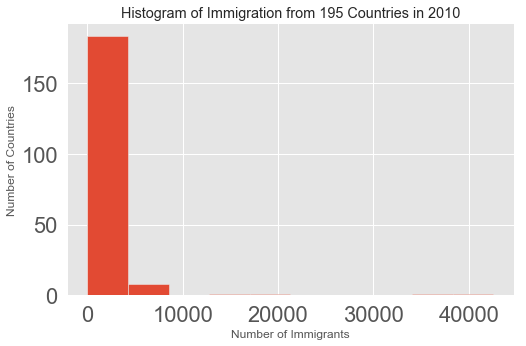

In [126]:
df[2005].plot(kind='hist', figsize=(8,5))
plt.title('Histogram of Immigration from 195 Countries in 2010')

# add a title to the histogram
plt.ylabel('Number of Countries') 

# add y-label
plt.xlabel('Number of Immigrants')

# add x-label
plt.show()

We made a histogram to show the distribution of 2005 data. The plot shows, Canada had about 0 to 5000 immigrants from most countries. Only a few countries contributed 20000 and a few more countries sent 40000 immigrants.

Let’s use the ‘top’ DataFrame from the scatter plot example and plot each country’s distribution of the number of immigrants in the same plot.

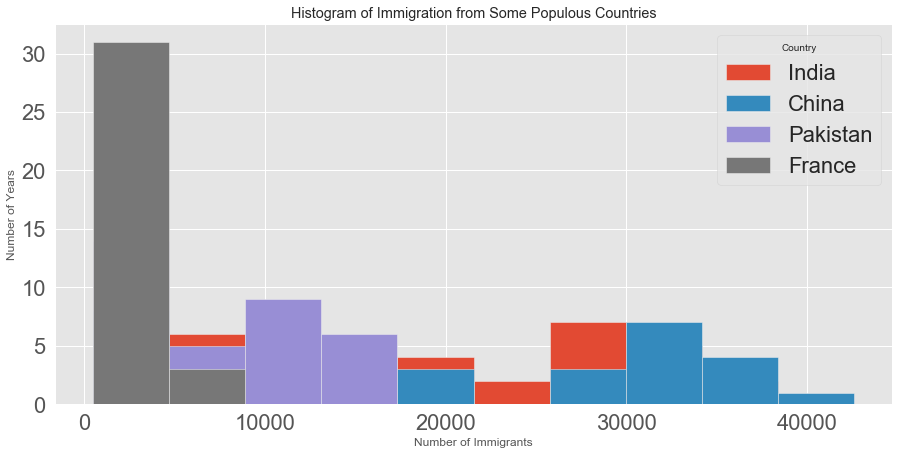

In [127]:
top.plot.hist()
plt.title('Histogram of Immigration from Some Populous Countries')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

In the previous histogram, we saw that Canada had 20000 and 40000 immigrants from a few countries. Looks like China and India are amongst those few countries. In this plot, we do not see the bin edges clearly. Let’s improve this plot.

__Specify the number of bins and find out the bin edges__

I will use 15 bins. I am introducing a new parameter here called ‘alpha’. The alpha value determines the transparency of the colors. For these types of overlapping plots, transparency is important to see the shape of each distribution.

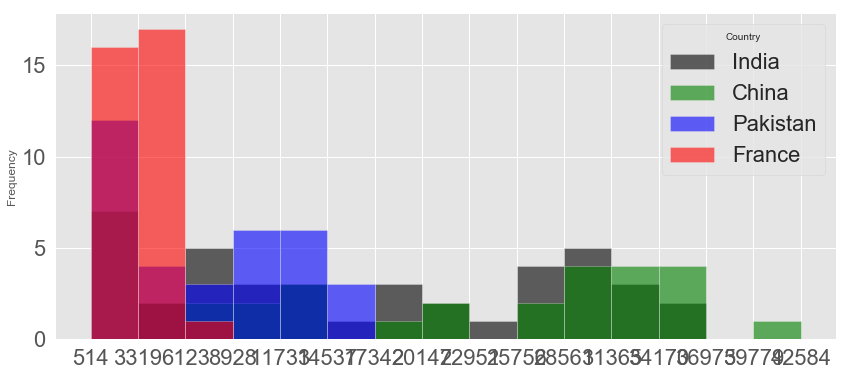

In [128]:
count, bin_edges = np.histogram(top, 15)
top.plot(kind = 'hist', figsize=(14, 6), bins=15, alpha=0.6, 
        xticks=bin_edges, color=colors)

## Bar Plot


For the bar plot, I will use the number of immigrants from France per year.

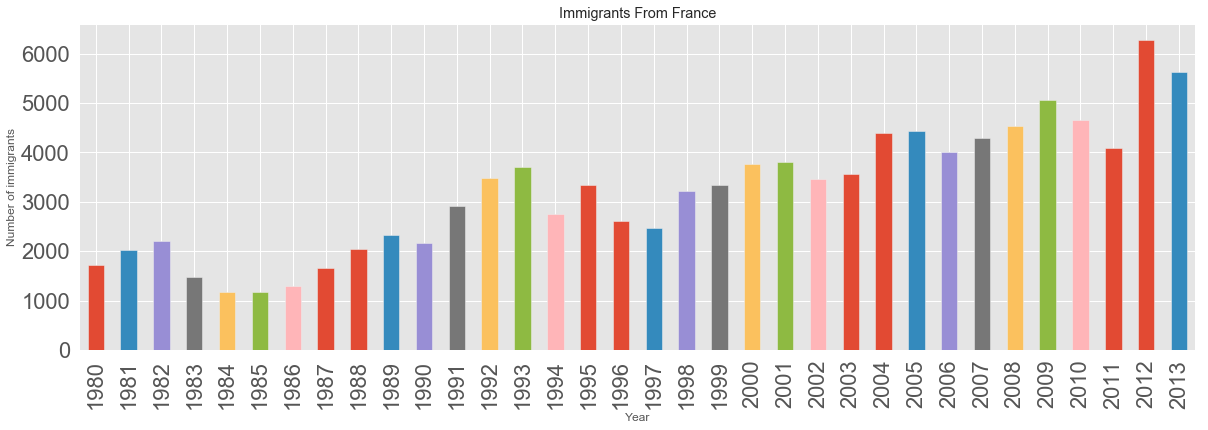

In [130]:
france = df.loc['France', years]
france.plot(kind='bar', figsize = (20, 6))

plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('Immigrants From France')
plt.show()

You can add extra information to the bar plot. This plot shows an increasing trend since 1997 for over a decade. It could be worth mentioning. It can be done using an annotate function.

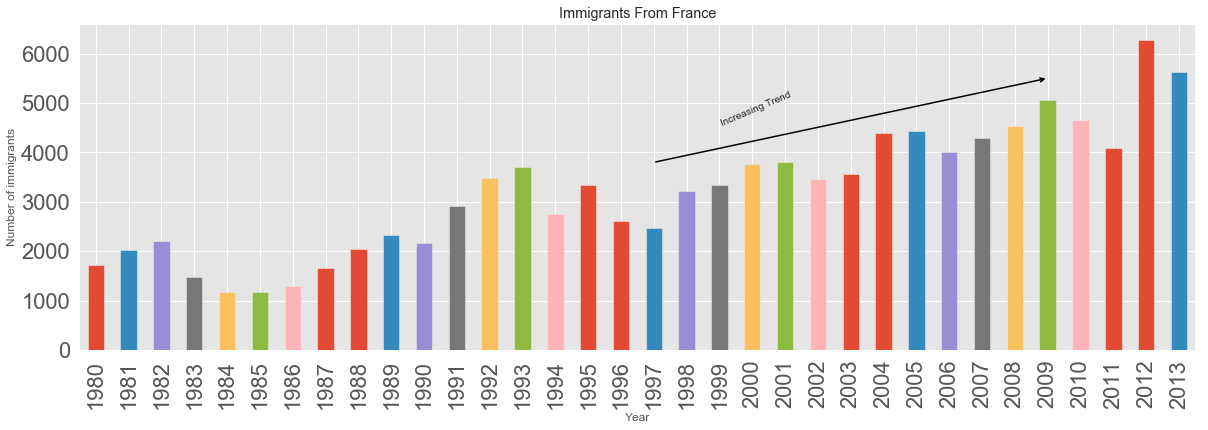

In [133]:
france.plot(kind='bar', figsize = (20, 6))
plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('Immigrants From France')
plt.annotate('Increasing Trend',
            xy = (19, 4500),
            rotation= 23,
            va = 'bottom',
            ha = 'left')
plt.annotate('',
            xy=(29, 5500),
            xytext=(17, 3800),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=1.5))
plt.show()

Sometimes, showing the bars horizontally makes it more understandable. Showing a label on the bars can be even better. Let’s do it.

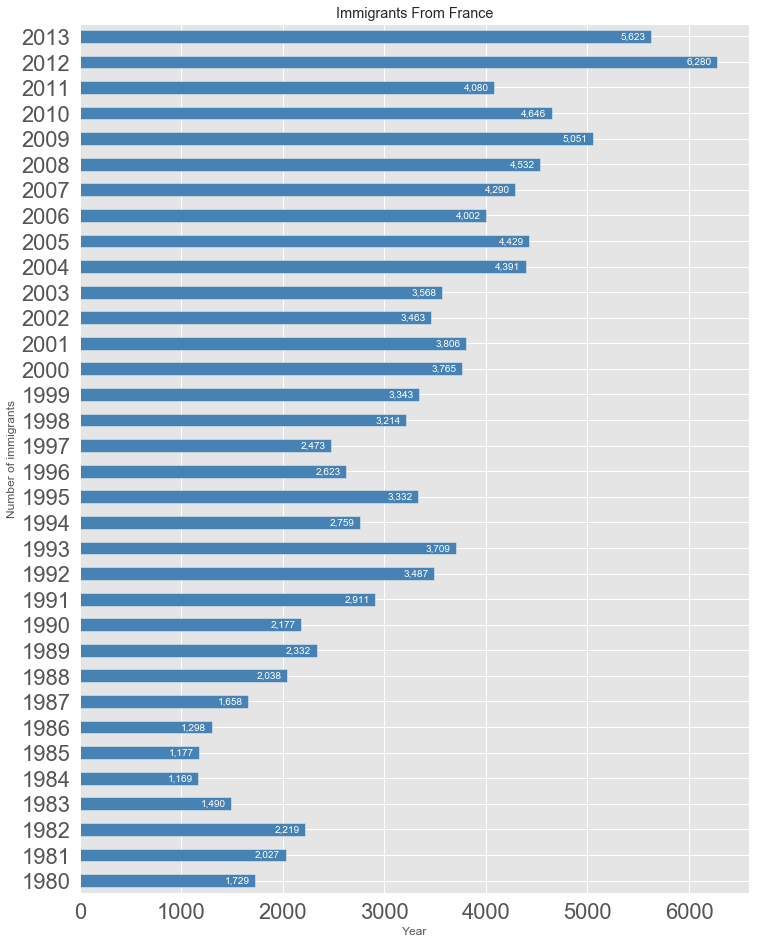

In [141]:
france.plot(kind='barh', figsize=(12, 16), color='steelblue')
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Immigrants From France') # add title to the plot

for index, value in enumerate(france):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-300, index-0.1), color='white')
    
plt.show()
